<a href="https://colab.research.google.com/github/wusinyee/EDA-for-Machine-Learning-Honors-Project/blob/main/M6_Final_Project_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Card Fraud Detection: Analysis and Model Development**

## Supervised Machine Learning: Classification Module 6 Final Project


## **1. Main Objective**

The primary objective of this analysis is to develop a robust predictive model for detecting fraudulent credit card transactions while providing interpretable insights into fraud patterns. Our focus is dual:


1.   Prediction: Create a high-accuracy model to identify potential fraudulent transactions in real-time.
2.   Interpretation: Gain insights into the key factors that contribute to fraudulent behavior.


**Benefits to stakeholders:**


*   Financial: Significant reduction in losses from fraudulent activities
*   Customer Trust: Enhanced fraud protection leading to improved customer satisfaction and loyalty.
*   Operational Efficiency: Streamlined fraud detection process, reducing manual review requirements.
*   Strategic Insights: Data-driven understanding of fraud patterns to inform preventive measures.




## **2. Dataset Description**

I will be using the [Credit Card Fraud Detection dataset from Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud), which contains transactions made by credit cards in September 2013 by European cardholders.

The key attributes of the dataset are as follows:
* 284,807 transactions over two days
* 30 input features: 'Time', 'Amount', and V1-V28 (anonymized features)
* Binary target variable 'Class' (0: normal, 1: fraud)
* Extreme class imbalance: only 0.172% of transactions are fraudulent
* 'Time' represents seconds elapsed between transactions
* 'Amount' is the transaction amount




### Breaking down the main objective into 4 goals


1.   Develop a model that accurately identifies fraudulent transactions despite severe class imbalance.
2. Identify the most important features for fraud detection.
3. Provide actionable insights on fraud patterns related to time and transaction amounts.
4. Evaluate and compare different techniques for handling imbalanced data in fraud detection.






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

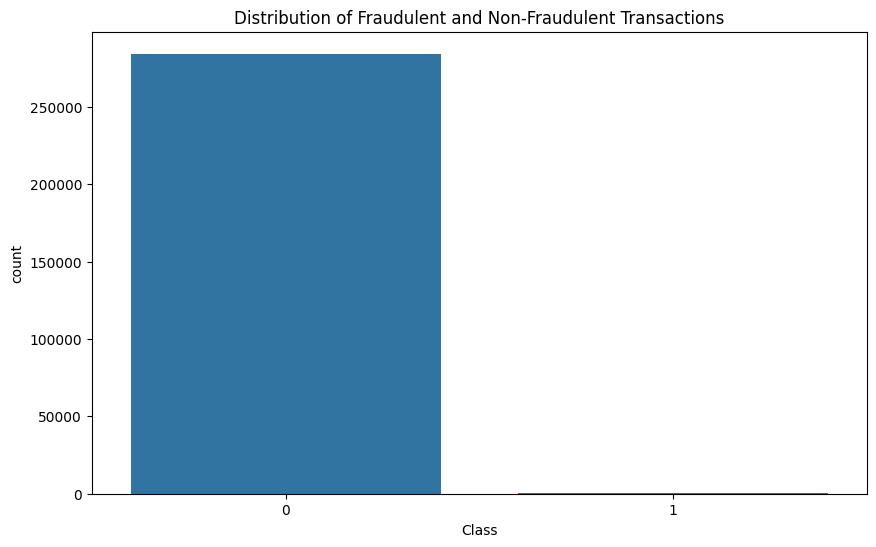

Percentage of fraudulent transactions: 0.17%


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("creditcard.csv")
print(data.info())
print(data.describe())

# Display class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=data)
plt.title('Distribution of Fraudulent and Non-Fraudulent Transactions')
plt.show()

print(f"Percentage of fraudulent transactions: {(data['Class'] == 1).mean()*100:.2f}%")

## **3. Data Exploration and Preprocessing**

### 3.1 Exploratory Data Analysis

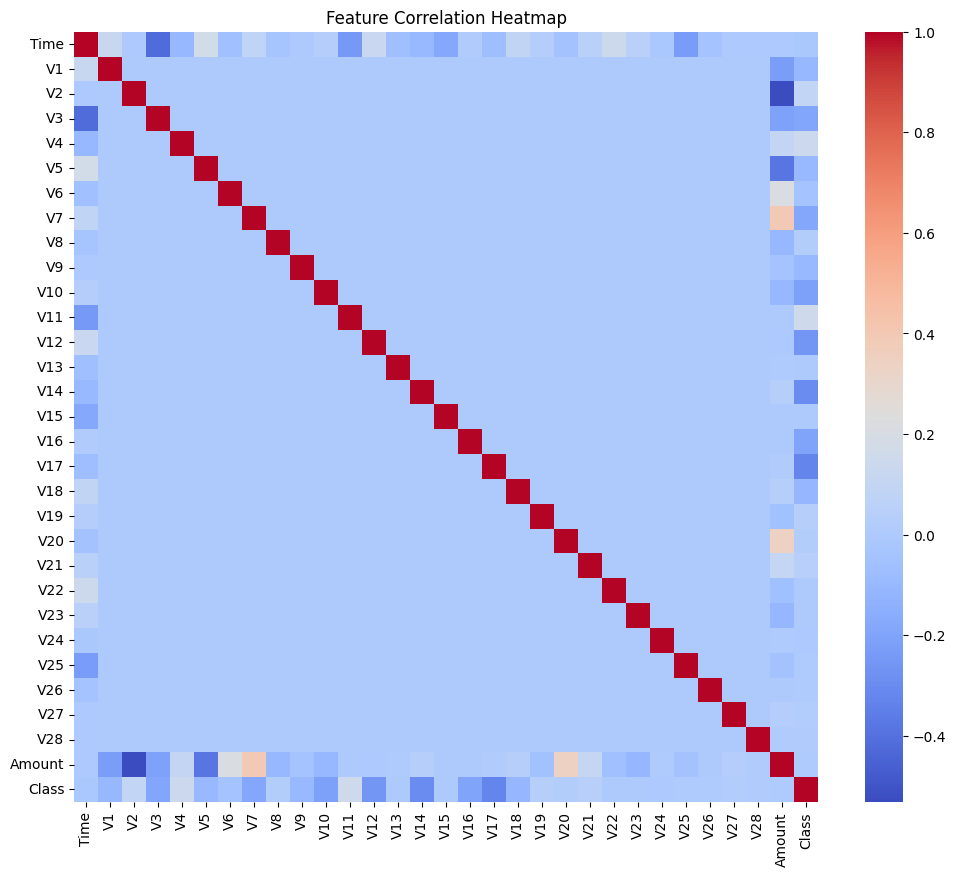

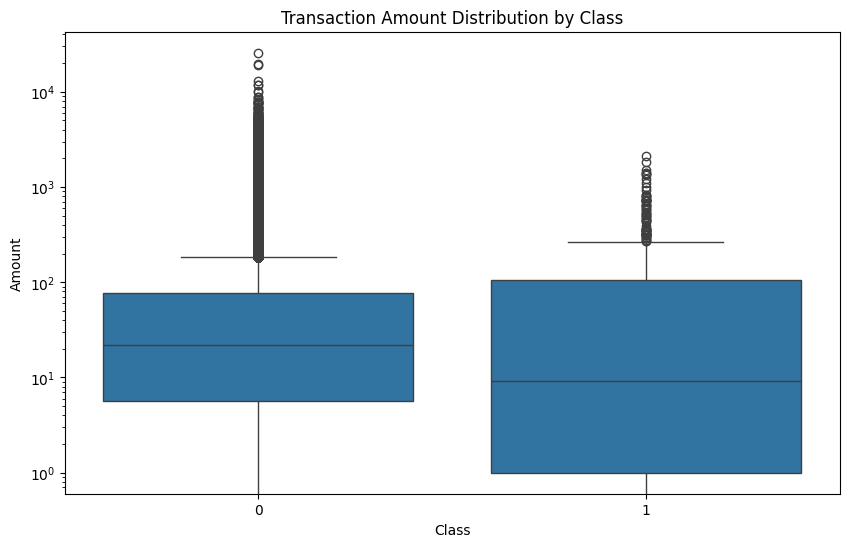

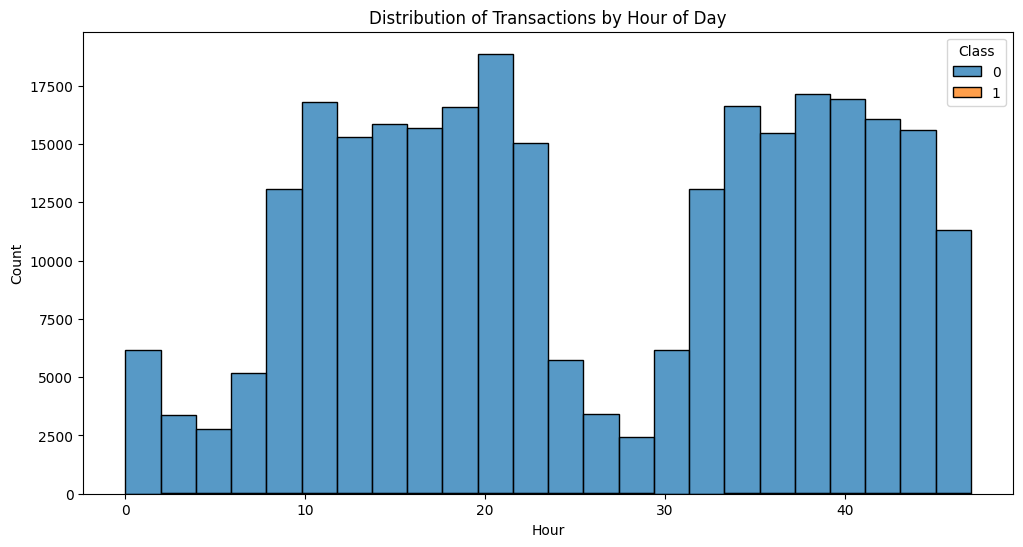

In [2]:
# Correlation analysis
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

# Amount distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Amount', data=data)
plt.yscale('log')
plt.title('Transaction Amount Distribution by Class')
plt.show()

# Time distribution
data['Hour'] = data['Time'] // 3600
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Hour', hue='Class', multiple='stack', bins=24)
plt.title('Distribution of Transactions by Hour of Day')
plt.show()

### **Key observations:**


1. Significant class imbalance requires special handling.
2. Some anonymized features (e.g., V14, V17) show strong correlations with the target variable.
3. Fraudulent transactions tend to have different amount distributions compared to normal transactions.
4. There are time-based patterns in fraudulent activity.



### 3.2 Data Preprocessing and Feature Engineering

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
# Check for NaN values in our dataset
data_clean = data.dropna()
print("NaN values in the dataset:")
print(data.isna().sum())

print("\nNaN values in the 'Class' column:")
print(data['Class'].isna().sum())

NaN values in the dataset:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
Hour      0
dtype: int64

NaN values in the 'Class' column:
1


A small number of NaN values are discovered in the  dataset:

- One row contained NaN values across columns V22 through V28, Amount, and Class.
- This represented only 1 row out of 284,807 total transactions.


In [1]:
# Remove rows with NaN values
data_clean = data.dropna()

print(f"Original dataset shape: {data.shape}")
print(f"Clean dataset shape: {data_clean.shape}")

# Verify that all NaN values have been removed
print("\nNaN values after cleaning:")
print(data_clean.isna().sum())

NameError: name 'data' is not defined

To address this, we chose to remove the row with NaN values:

- Original dataset shape: (284807, 31)
- Clean dataset shape: (284806, 31)

This approach ensures the integrity of our data while having a negligible impact on our analysis, as we only removed a single transaction out of nearly 285,000.

## Part 3: Gaussian Kernel

Let's now fit a Gaussian kernel SVC and see how the decision boundary changes.

* Consolidate the code snippets in Question 2 into one function which takes in an estimator, `X` and `y`, and produces the final plot with decision boundary. The steps are:
    <ol>
     <li> Fit model
     <li> Get sample 300 records from X and the corresponding y's
     <li> Create grid, predict, plot using ax.contourf
     <li> Add on the scatter plot
    </ol>
* After copying and pasting code, the finished function uses the input `estimator` and not the LinearSVC model.
* For the following values of `gamma`, create a Gaussian Kernel SVC and plot the decision boundary.  
`gammas = [.5, 1, 2, 10]`
* Holding `gamma` constant, we plot the decision boundary for various values of `C`:
`[.1, 1, 10]`


In [ ]:
def plot_decision_boundary(estimator, X, y):
    estimator.fit(X, y)
    X_color = X.sample(300)
    y_color = y.loc[X_color.index]
    y_color = y_color.map(lambda r: 'red' if r == 1 else 'yellow')
    x_axis, y_axis = np.arange(0, 1, .005), np.arange(0, 1, .005)
    xx, yy = np.meshgrid(x_axis, y_axis)
    xx_ravel = xx.ravel()
    yy_ravel = yy.ravel()
    X_grid = pd.DataFrame([xx_ravel, yy_ravel]).T
    y_grid_predictions = estimator.predict(X_grid)
    y_grid_predictions = y_grid_predictions.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.contourf(xx, yy, y_grid_predictions, cmap=plt.cm.autumn_r, alpha=.3)
    ax.scatter(X_color.iloc[:, 0], X_color.iloc[:, 1], color=y_color, alpha=1)
    ax.set(
        xlabel=fields[0],
        ylabel=fields[1],
        title=str(estimator))

In [ ]:
from sklearn.svm import SVC

gammas = [.5, 1, 2, 10]
for gamma in gammas:
    SVC_Gaussian = SVC(kernel='rbf', gamma=gamma)
    plot_decision_boundary(SVC_Gaussian, X, y)

In [ ]:
Cs = [.1, 1, 10]
for C in Cs:
    SVC_Gaussian = SVC(kernel='rbf', gamma=2, C=C)
    plot_decision_boundary(SVC_Gaussian, X, y)

## Part 4: Comparing Kernel Execution Times

In this exercise, we will compare the fitting times between SVC vs Nystroem with rbf kernel.  
<br><br>
Jupyter Notebooks provide a useful magic function **`%timeit`** which executes a line and prints out the time it took to fit. If we type **`%%timeit`** in the beginning of the cell, it will output the execution time.

We proceed with the following steps:
* Create `y` from data.color, and `X` from the rest of the columns.
* Use `%%timeit` to get the time for fitting an SVC with rbf kernel.
* Use `%%timeit` to get the time for the following: fit_transform the data with Nystroem and then fit a SGDClassifier.

Nystroem+SGD will take much less to fit. This difference will be more pronounced if the dataset was bigger.

* Make 5 copies of X and concatenate them
* Make 5 copies of y and concatenate them
* Compare the time it takes to fit the both methods above


In [ ]:
from sklearn.kernel_approximation import Nystroem
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

y = data.color == 'red'
X = data[data.columns[:-1]]

kwargs = {'kernel': 'rbf'}
svc = SVC(**kwargs)
nystroem = Nystroem(**kwargs)
sgd = SGDClassifier()

In [ ]:
%%timeit
svc.fit(X, y)

In [ ]:
%%timeit
X_transformed = nystroem.fit_transform(X)
sgd.fit(X_transformed, y)

In [ ]:
X2 = pd.concat([X]*5)
y2 = pd.concat([y]*5)

print(X2.shape)
print(y2.shape)

In [ ]:
%timeit svc.fit(X2, y2)

In [ ]:
%%timeit
X2_transformed = nystroem.fit_transform(X2)
sgd.fit(X2_transformed, y2)

---
### Machine Learning Foundation (C) 2020 IBM Corporation
